# Data Preprocessing Tools

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# creating data frame object
dataset = pd.read_csv('Data.csv')
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [3]:
# creating matrix of features
# x = all rows without dependent column 
# first iloc value : (: is for range) is for rows
# second iloc valu :-1 is for columns (all except last)
X = dataset.iloc[:, :-1].values

# creating matrix of vector (all rows and only the last column)
# y = with dependent variable (purchased)
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Missing data management

We have NaN values in our dataset, we can manage in 2 different ways:
  - removing rows with empty values (work with large dataset and few empty lines) 
  - replacing values with average values or median value


In [6]:
from sklearn.impute import SimpleImputer

In [7]:
# we want to replace nan values with average
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [8]:
# do replace values on matrix of features X
# we need to pass only numerical values from the matrix of features, it means all columns except first
imputer.fit(X[:, 1:3])
# transformation must be assigned to columns of the matrix of features
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [9]:
# nan values have been replaced in all numeric columns
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the independent variable

We must encode the variable into numerical values. 
For example: France = 0, Spain = 1, Germany = 2, etc. Assigned value to countries in this case doesn't mean we classify or order the data. Best practice is to use use 'one hot encoding': it consists on turning countries values onto n columns. More specifically, we convert country onto binary vector. 
For example: 
  - France has vector 1, 0, 0
  - Spain has vector 0, 1, 0
  - Germany has vector 0, 0, 1
  
The dimension of the vector depends on number of independent variables.

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [11]:
# create a column tranformer instance. 
# transformer : specify transformation to do, which encoding, and on which column
# remainder : specify what will be applied to other columns: passthrough mean we keep other columns as they are
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])], 
    remainder='passthrough')

In [12]:
# do transform the data
X = np.array(ct.fit_transform(X))

In [13]:
# country column is replaced by numeric columns: One Hot Encoding
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the dependent variable

The dependent variable is the content of the purchased column. As it has only two different values, it can't be replace by 0 or 1. In this specfic case, one hot encoding is not necessary. 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder();

In [16]:
y = le.fit_transform(y)

In [17]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into training set and test set

We apply feature scaling after splitting dataset onto training set and test set. 
The 2 sets have separate goals: 
 - training set: allow to train our model 
 - test set: allow to measure performance of the model
 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# 80% in training & 20% in test
# last param is optional, it allows to have the same train set each time 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [20]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [21]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [22]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [23]:
print(y_test)

[0 1]


## Feature scaling

Feature scalling allow to scale all the feature to have values in the same range in order to avoid some values to have predominance. For example age can be between 1 and 99 and incomes between 0 and 250.000 ... incomes would have more importance than age because of value ranges.

2 techniques of scaling can be used
  - normalization: values are in [0, 1] range
  - standardization: values are in [-3, +3] range
  
Feature scaling must be applied **AFTER** the splitting operation because: 
  - the test set is supposed to be a brand new set on which we want to test a model. The test is not supposed to be modified before  
  - test set is supposed not to be influenced b a dataset containing train set: it would create an **information leakage**
 
 
  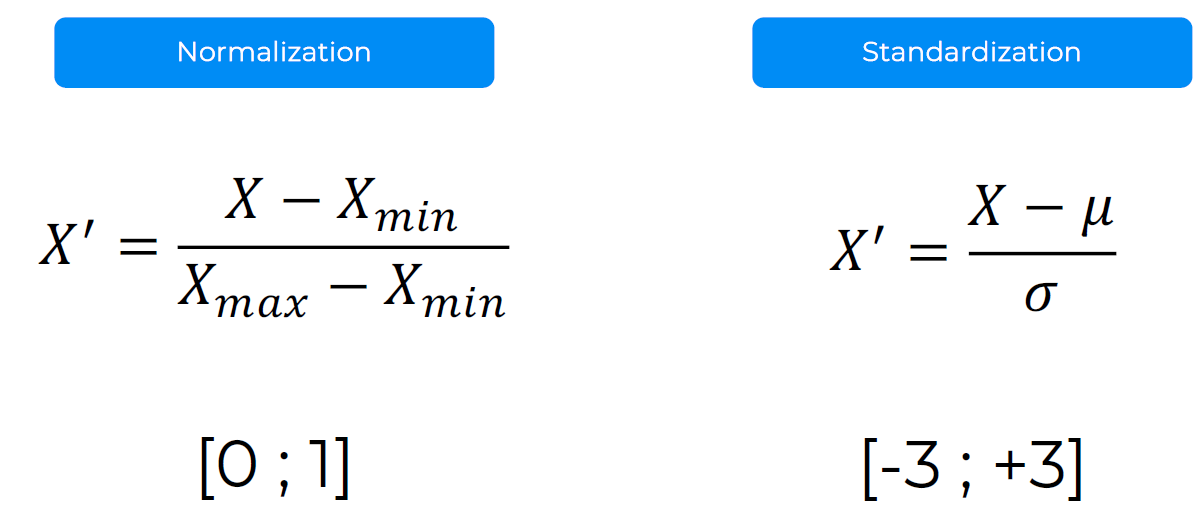
  
  
**Note:**
 - Normalization is recommended when we have a normal distribution. 
 - Standardisation is working in all cases

In [24]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

In [25]:
# for reminder
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [26]:
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [27]:
# Apply feature scaling on the training and test sets 
# 3 first columns are used for countries, the 2 others are for age and salary

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# this data is like new data, we use same scaler and just transform data
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [28]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [29]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
